## Question 2:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creating 2 different classes with 1000 data points each.
N = 1000
c1=[]
c2=[]
mean = [1.0,2.0]
cov = [[0.3, 0.2],[0.2, 0.3]]
data = np.random.multivariate_normal(mean, cov, N)

In [3]:
mean = [1,0.5]
cov = [[0.3, 0.2],[0.2, 0.3]]
data2 = np.random.multivariate_normal(mean, cov, N)

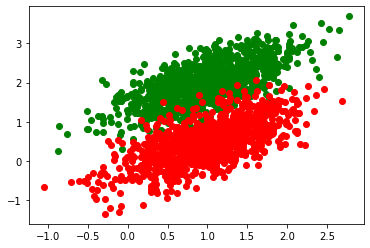

In [4]:
plt.scatter(data[:,0], data[:,1], c='green')
plt.scatter(data2[:,0], data2[:,1], c='red')
plt.show()

In [5]:
for i in range(N):
    c1=np.append(c1,"c1")
    c2=np.append(c2,"c2")
    

In [6]:
df1=pd.DataFrame(data,columns=["X","Y"])
df2=pd.DataFrame(data2,columns=["X","Y"])
df3=pd.DataFrame(c1,columns=["C1"])
df4=pd.DataFrame(c2,columns=["C2"])

In [7]:
df1.to_csv("data1.csv")
df2.to_csv("data2.csv")
df3.to_csv("class1.csv")
df4.to_csv("class2.csv")

In [8]:
df=pd.read_csv("FinalDataSet.csv")

In [9]:
df=df.drop(columns=["Unnamed: 0"])
df.head()

,X,Y,Class
0,0.735007,1.549287,c1
1,0.300744,1.363480,c1
2,0.545280,1.078769,c1
3,1.163097,2.208632,c1
4,0.057364,0.636162,c1


In [10]:
#### Schuffle the data set to schuffle the classes
df = df.sample(frac = 1)
df.head()


,X,Y,Class
652,0.949481,1.896517,c1
305,1.499848,2.389161,c1
1492,0.148280,-0.184046,c2
97,0.738402,1.623941,c1
760,1.157039,1.460554,c1


<AxesSubplot:xlabel='X', ylabel='Y'>

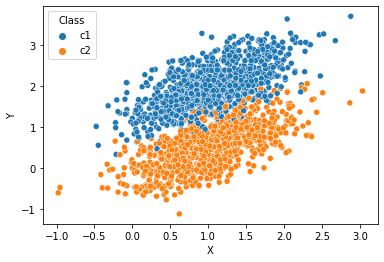

In [11]:
import seaborn as sns
sns.scatterplot(data=df,x="X",y="Y",hue="Class")

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape)
print(y)

(2000, 2)
['c1' 'c1' 'c2' ... 'c1' 'c2' 'c2']


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [17]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc=accuracy_score(y_test, y_pred)
print("The accuracy of Logistic Regression Classifier is :",acc )

[[244   5]
 [ 15 236]]
The accuracy of Logistic Regression Classifier is : 0.96


In [18]:
print (classifier.intercept_, classifier.coef_)

[-0.15597516] [[ 2.41579663 -6.46962978]]
